In [ ]:
project_root_path = '/home/matt/Projects/Web3HackerNetwork'

In [ ]:
import sys

bob_lib_path = project_root_path + "/sandbox/python/bob/"
sys.path.append(bob_lib_path)
import commit_stat_engineering

In [ ]:
# this is the other way to handle imports, if you want the code visible:
# %load /home/bob/projects/Web3HackerNetwork/sandbox/python/bob/commit_stat_engineering.py

In [ ]:
import json

dataset_dir = project_root_path + '/data/github/2022-04-07-marine-search'
project_stats_dir = dataset_dir + '/projects'
all_commit_logs = commit_stat_engineering.find_files('commit-stat.log.json', project_stats_dir)
all_stats = commit_stat_engineering.get_stats_for_all_commits(all_commit_logs)

In [ ]:
first = True
for stat in [stat for stat in all_stats if stat['rustFiles'] > 0 and stat['markdownFiles'] > 0 and stat['jsonFiles'] > 0 and stat['javascriptFiles'] > 0]:
    if first:
        print(json.dumps(stat, indent=2))
        first = False
    else: break

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

total_file_observations = [np.log1p(commit_stats['totalFiles']) for commit_stats in all_stats]
plt.figure(figsize=(12, 4))
plt.hist(total_file_observations, 75)
plt.show()

In [ ]:
rust_commits = [commit for commit in all_stats if commit['rustLines'] > 0]

total_rust_lines = [
    np.log1p(commit_stats['rustLines']) 
    for commit_stats 
     in rust_commits 
]

plt.figure(figsize=(12, 4))
plt.hist(total_rust_lines, 100)

plt.show()

In [62]:
from IPython.display import display, Markdown, Latex
def printHistAndScatterPlot( dataset_id ):
    histogram_data_set = [
        np.log1p(commit_stats[dataset_id])
        for commit_stats 
        in all_stats if commit_stats[dataset_id] > 0
    ]
    scatter_data_set = [
        np.log1p(commit_stats[dataset_id])
        for commit_stats
         in all_stats
    ]
    display(Markdown('### '+dataset_id+' histogram'))
    plt.figure(figsize=(12,4))
    plt.hist(histogram_data_set, 100)
    plt.show()
    display(Markdown('### '+dataset_id+' vs totalFiles scatter plot'))
    plt.figure(figsize=(24,16))
    plt.scatter(total_file_observations, scatter_data_set)
    plt.show()


### rustLines histogram

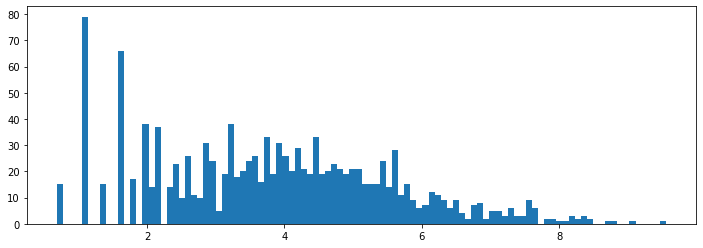

### rustLines vs totalFiles scatter plot

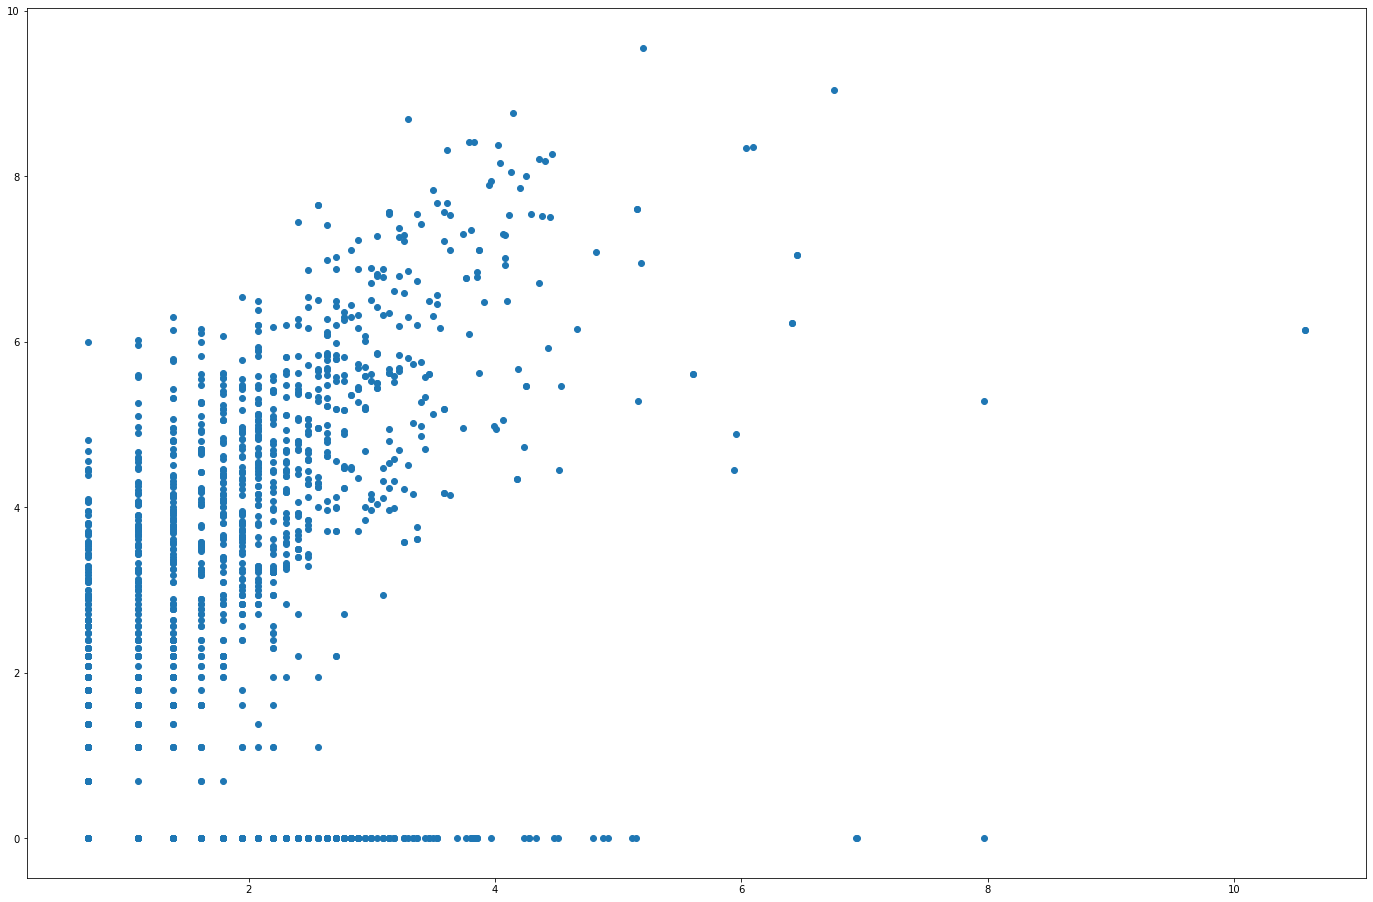

### jsonLines histogram

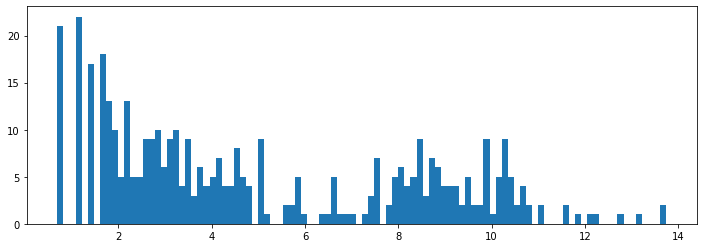

### jsonLines vs totalFiles scatter plot

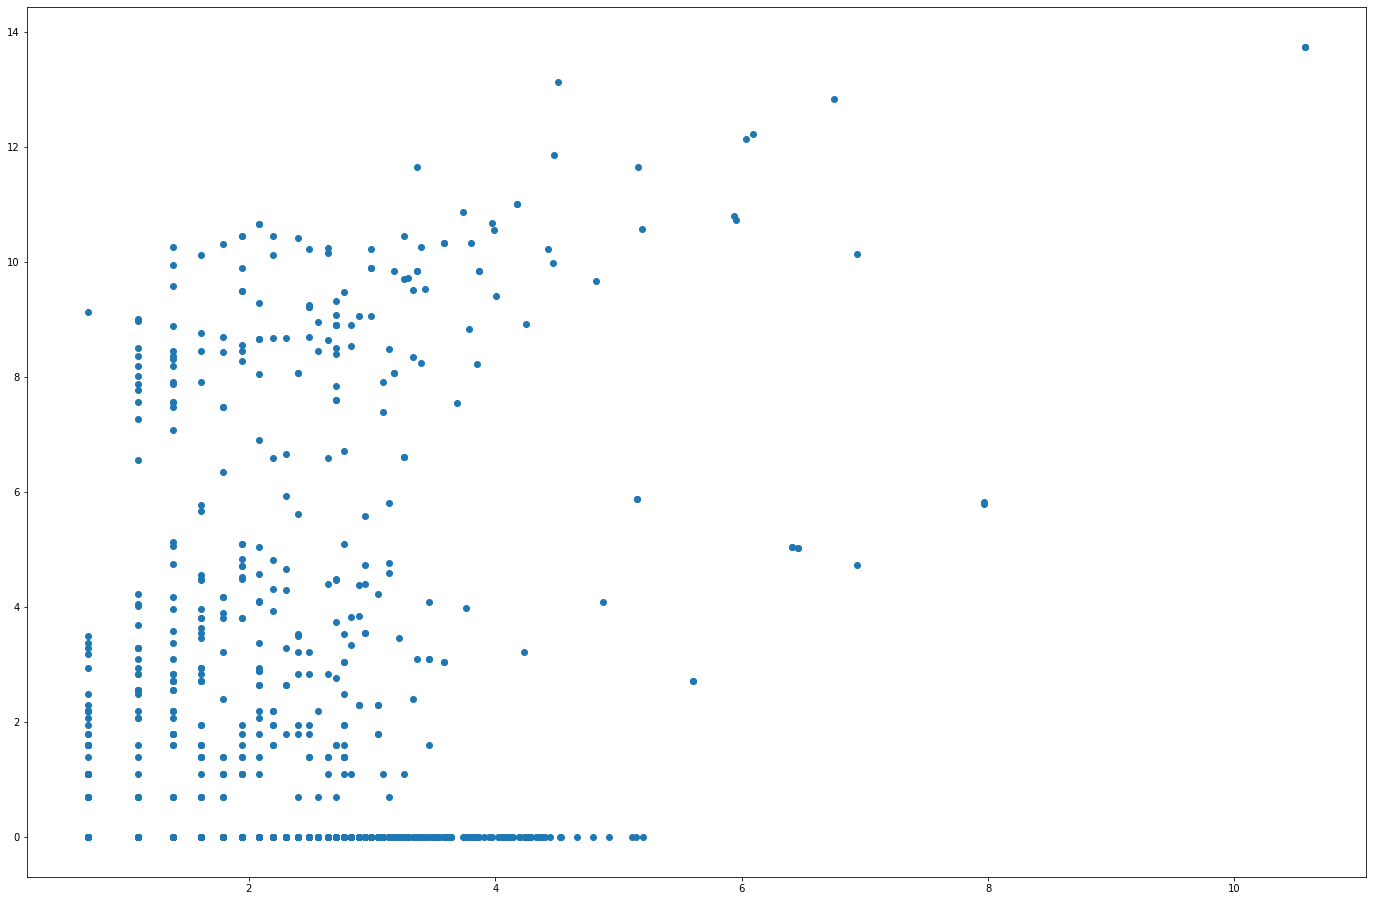

### javascriptLines histogram

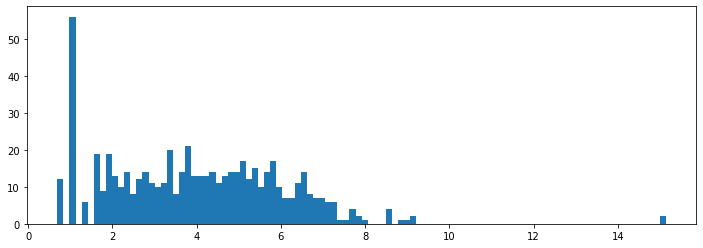

### javascriptLines vs totalFiles scatter plot

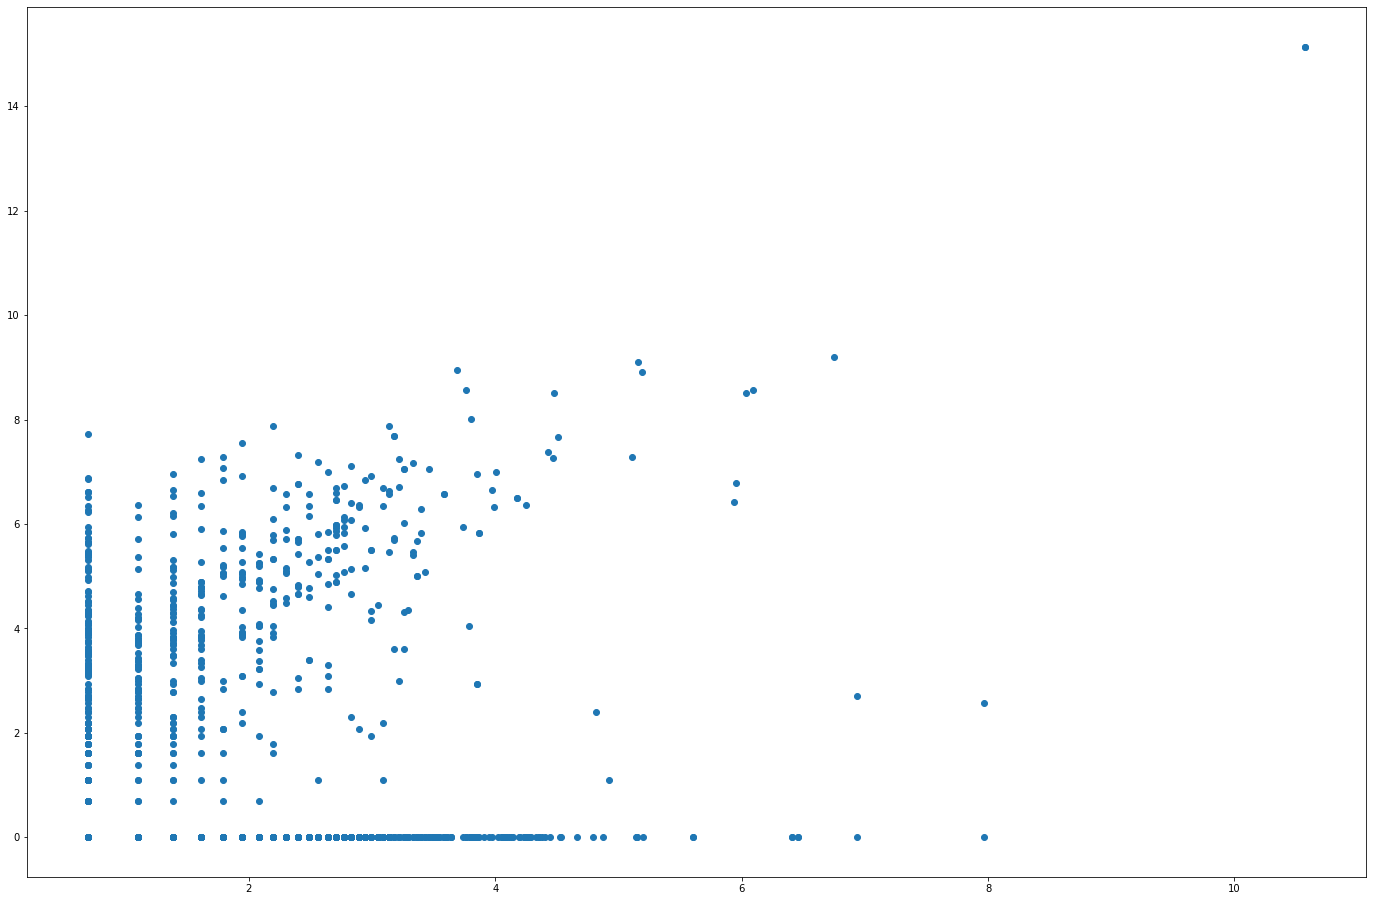

### markdownLines histogram

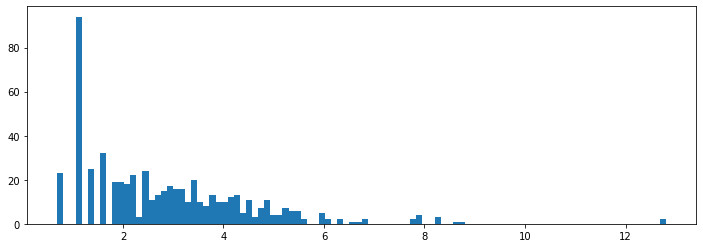

### markdownLines vs totalFiles scatter plot

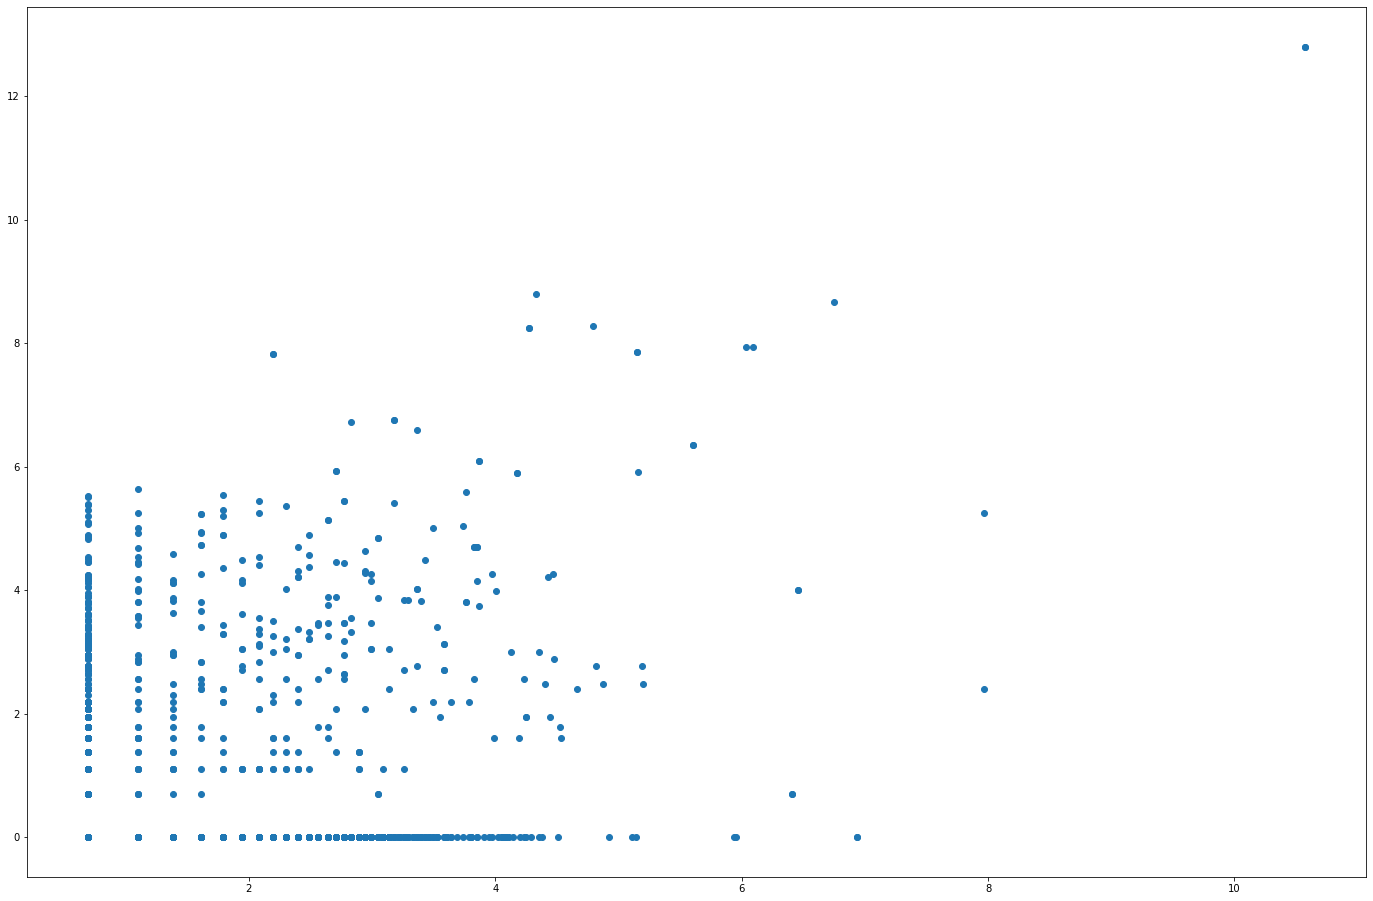

### htmlLines histogram

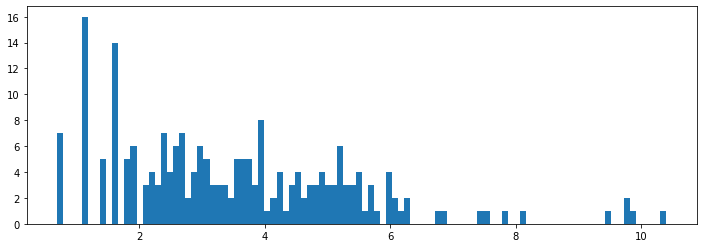

### htmlLines vs totalFiles scatter plot

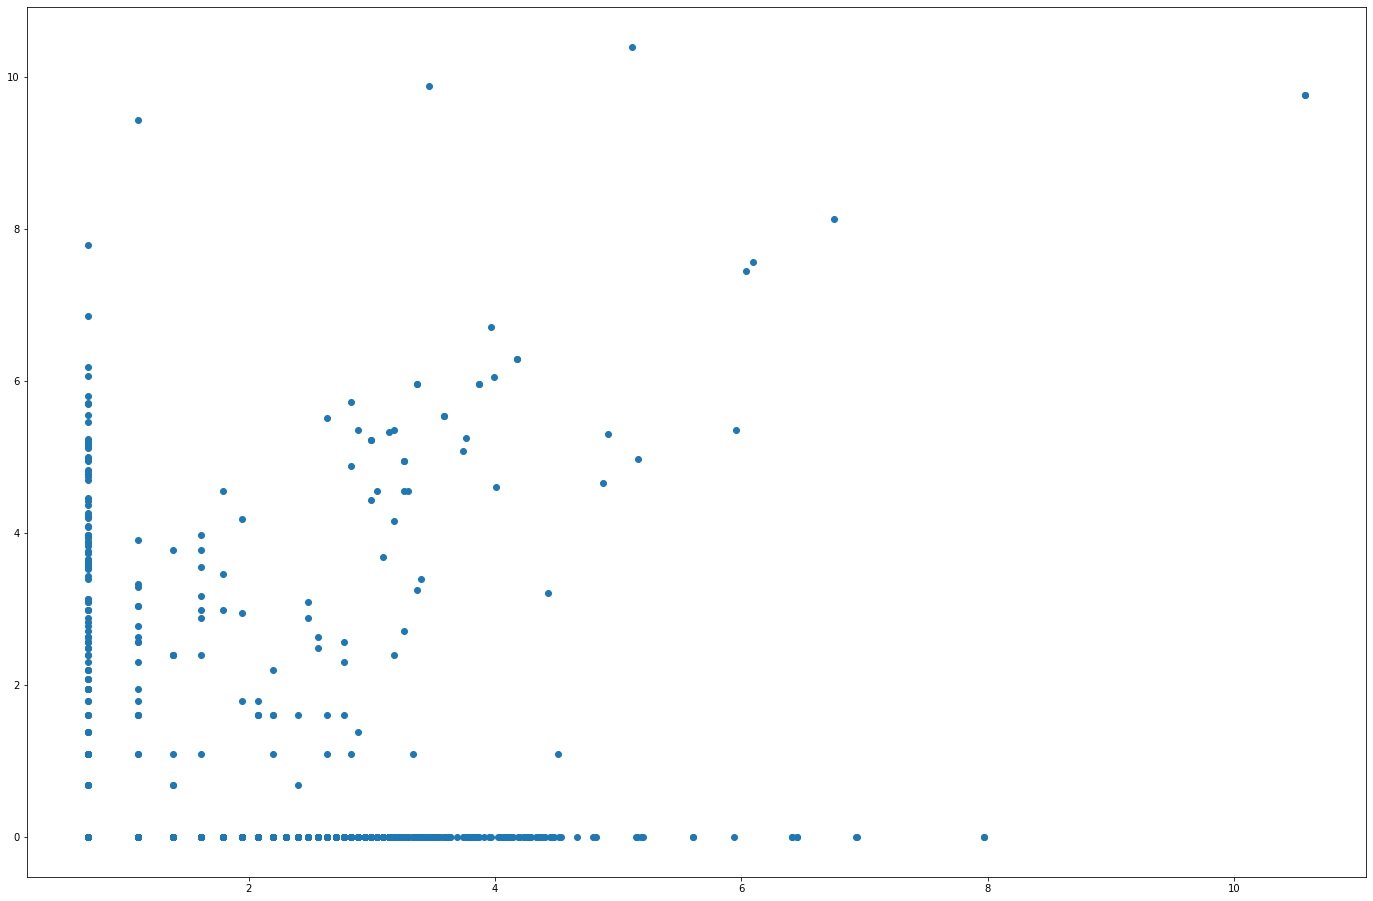

### lockLines histogram

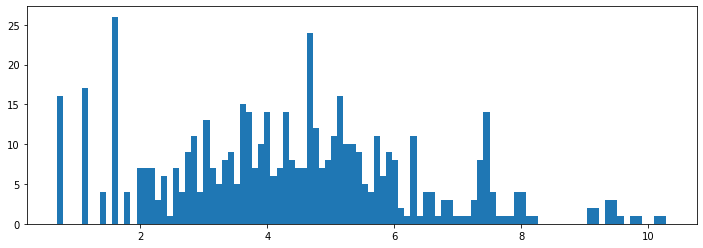

### lockLines vs totalFiles scatter plot

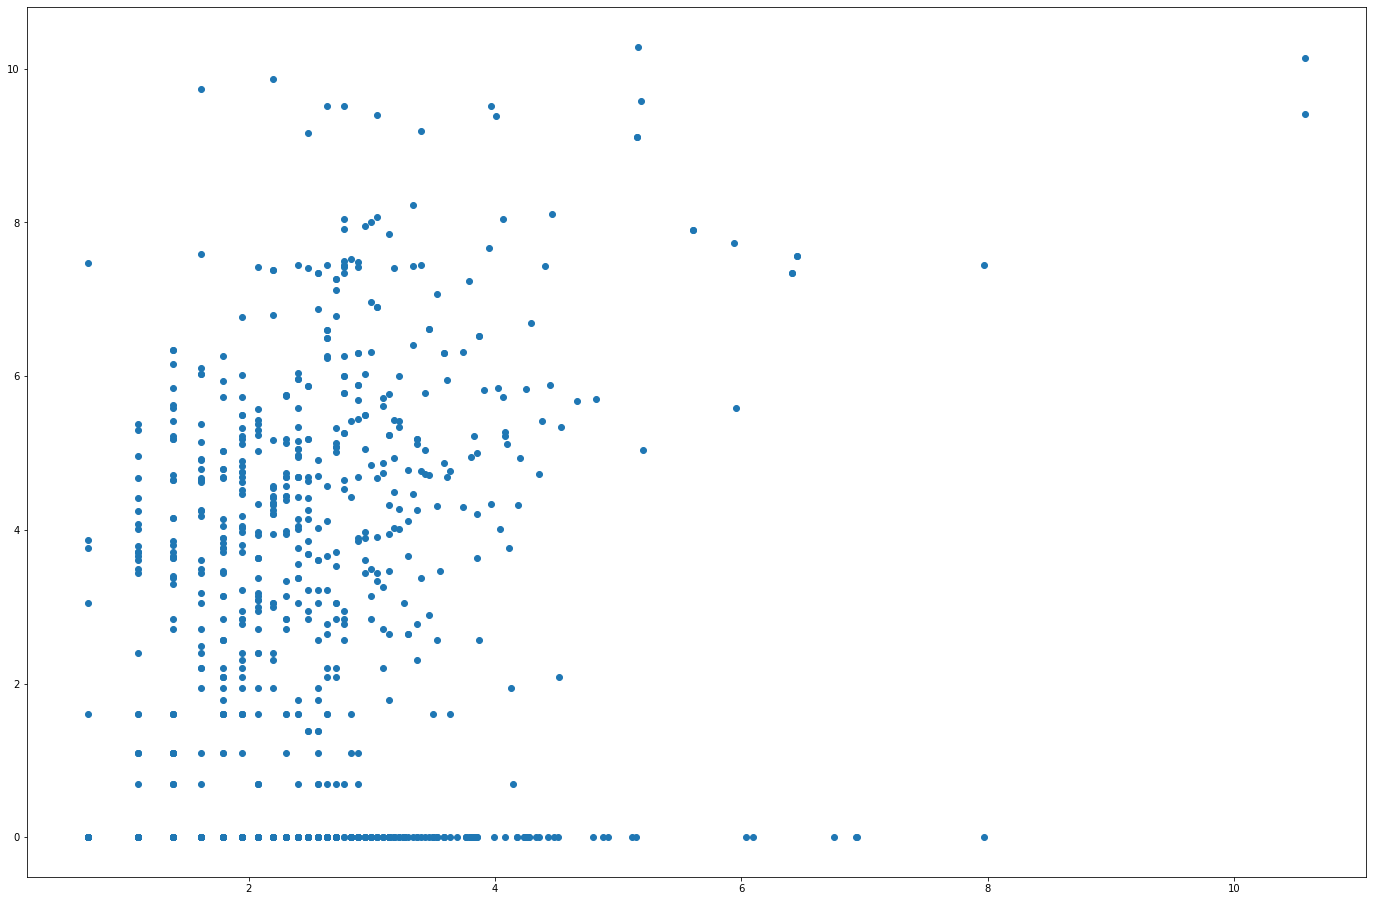

### yarnLines histogram

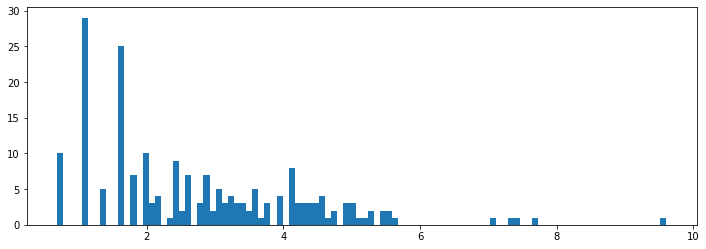

### yarnLines vs totalFiles scatter plot

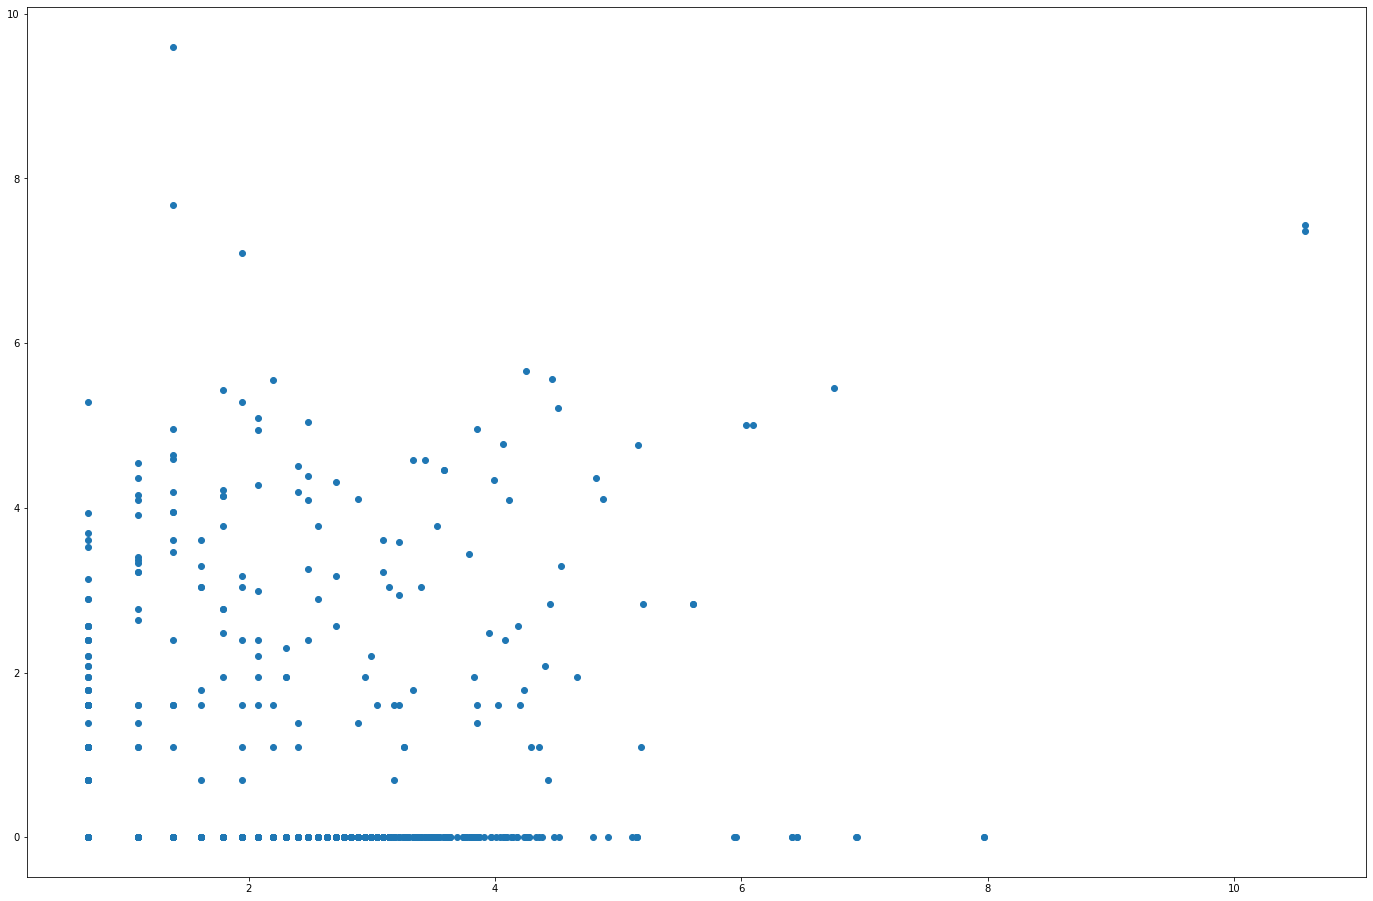

In [63]:
datasets_of_interest = ['rustLines', 'jsonLines', 'javascriptLines', 'markdownLines', 'htmlLines', 'lockLines', 'yarnLines']
for dataset_id in datasets_of_interest:
    printHistAndScatterPlot(dataset_id)

In [ ]:
datasets_of_interest = ['rustLines', 'jsonLines', 'javascriptLines', 'markdownLines', 'htmlLines', 'lockLines', 'yarnLines']
for datasetID in datasets_of_interest:
    lineCounts = [
        np.log1p(commit_stats[datasetID])
        for commit_stats in all_stats]
    plt.figure(figsize=(24, 16))
    plt.scatter(total_file_observations, lineCounts).set_label(datasetID)
    plt.show()